# Data exploration

In [1]:
import sys
ABS_ROOT_DIR_PATH = '/home/rutkowski/dissertation/' #'/host/dissertation/'
if ABS_ROOT_DIR_PATH not in sys.path:
    sys.path.append(ABS_ROOT_DIR_PATH)

from common.exploration import print_advanced_stats, print_multiple_advanced_stats, plot_histogram, plot_multiple_histograms
import numpy as np

## spacepoints.csv

### percentages

In [2]:
raw_data = np.load('../proccessed_data/x_y_phi_pt_q.npy')
# printlen(raw_data[:,0]))
number_of_event_ids = len(np.unique(raw_data[:,0]))
print('number_of_event_ids:', number_of_event_ids)

from collections import Counter
# {event_id: number_of_spacepoints}
event_ids_count = dict(Counter(raw_data[:,0]))
print('event_ids_count:', event_ids_count)
# {number_of_spacepoints: number_of_events}
spacepoints_count = dict(Counter(event_ids_count.values()))
possible_number_of_spacepoints = list(spacepoints_count.keys())
possible_number_of_spacepoints.sort()
spacepoints_count = {i: spacepoints_count[i] for i in possible_number_of_spacepoints}
print('spacepoints_count:', spacepoints_count)

spacepoints_count_percentage = {i: 100*spacepoints_count[i]/number_of_event_ids for i in possible_number_of_spacepoints}
print('spacepoints_count_percentage:', spacepoints_count_percentage)

number_of_event_ids: 10000
event_ids_count: {0.0: 14, 1.0: 9, 2.0: 11, 3.0: 11, 4.0: 9, 5.0: 8, 6.0: 14, 7.0: 12, 8.0: 14, 9.0: 10, 10.0: 12, 11.0: 17, 12.0: 15, 13.0: 12, 14.0: 13, 15.0: 13, 16.0: 13, 17.0: 8, 18.0: 15, 19.0: 12, 20.0: 11, 21.0: 12, 22.0: 11, 23.0: 13, 24.0: 13, 25.0: 9, 26.0: 10, 27.0: 11, 28.0: 15, 29.0: 12, 30.0: 14, 31.0: 13, 32.0: 13, 33.0: 14, 34.0: 14, 35.0: 12, 36.0: 12, 37.0: 13, 38.0: 14, 39.0: 16, 40.0: 11, 41.0: 12, 42.0: 12, 43.0: 11, 44.0: 8, 45.0: 4, 46.0: 10, 47.0: 3, 48.0: 13, 49.0: 11, 50.0: 12, 51.0: 4, 52.0: 10, 53.0: 14, 54.0: 16, 55.0: 10, 56.0: 11, 57.0: 14, 58.0: 14, 59.0: 11, 60.0: 14, 61.0: 13, 62.0: 12, 63.0: 16, 64.0: 11, 65.0: 14, 66.0: 15, 67.0: 12, 68.0: 15, 69.0: 16, 70.0: 11, 71.0: 12, 72.0: 7, 73.0: 10, 74.0: 14, 75.0: 12, 76.0: 10, 77.0: 11, 78.0: 12, 79.0: 3, 80.0: 15, 81.0: 11, 82.0: 15, 83.0: 11, 84.0: 15, 85.0: 13, 86.0: 16, 87.0: 14, 88.0: 14, 89.0: 14, 90.0: 13, 91.0: 13, 92.0: 7, 93.0: 14, 94.0: 12, 95.0: 13, 96.0: 9, 97.0: 11

In [3]:
min_number_of_spacepoints = min(possible_number_of_spacepoints)
max_number_of_spacepoints = max(possible_number_of_spacepoints)

print('liczba punktów detekcji & liczba cząstek wykrytych dokładnie tyle razy & część wszystkich cząstek wykrytych co najmniej tyle razy \\\ ')
for max_accepted_number_of_spacepoints in range(min_number_of_spacepoints, max(possible_number_of_spacepoints)+1):
    cumulative_percentage = 0
    cumulative_count = 0
    for i in range(max_accepted_number_of_spacepoints, max(possible_number_of_spacepoints)+1):
        cumulative_percentage += spacepoints_count_percentage[i]
        cumulative_count += spacepoints_count[i]
    print(f'{max_accepted_number_of_spacepoints:2} & {spacepoints_count[max_accepted_number_of_spacepoints]:5} & {cumulative_percentage:6.2f}\% \\\ ')

liczba punktów detekcji & liczba cząstek wykrytych dokładnie tyle razy & część wszystkich cząstek wykrytych co najmniej tyle razy \\ 
 2 &    57 & 100.00\% \\ 
 3 &   171 &  99.43\% \\ 
 4 &   293 &  97.72\% \\ 
 5 &   307 &  94.79\% \\ 
 6 &   249 &  91.72\% \\ 
 7 &   173 &  89.23\% \\ 
 8 &   273 &  87.50\% \\ 
 9 &   308 &  84.77\% \\ 
10 &   636 &  81.69\% \\ 
11 &   994 &  75.33\% \\ 
12 &  1513 &  65.39\% \\ 
13 &  1663 &  50.26\% \\ 
14 &  1557 &  33.63\% \\ 
15 &   985 &  18.06\% \\ 
16 &   476 &   8.21\% \\ 
17 &   231 &   3.45\% \\ 
18 &    74 &   1.14\% \\ 
19 &    30 &   0.40\% \\ 
20 &     9 &   0.10\% \\ 
21 &     1 &   0.01\% \\ 


### stats

In [4]:
import pandas as pd
spacepoints_df = pd.read_csv('./ODD_Single_muon_10k/spacepoints.csv')

In [5]:
spacepoints_df.filter(['x', 'y', 'var_r']).describe()#.applymap('{:.3e}'.format)

,x,y,var_r
count,118283.000000,118283.000000,1.182830e+05
mean,-1.777879,0.617847,8.148600e-01
std,331.191956,332.297989,2.004532e+00
min,-1030.880005,-1030.621948,1.097863e-13
25%,-106.683109,-104.175156,2.774661e-05
50%,-0.831871,-0.136189,2.520890e-04
75%,104.751804,106.594337,9.000000e-04
max,1029.900879,1030.748657,5.760000e+00


In [6]:
spacepoints_df.filter(['z', 'var_z']).describe()#.applymap('{:.3e}'.format)

,z,var_z
count,118283.000000,1.182830e+05
mean,10.948954,2.451021e-01
std,1193.800599,5.410991e-01
min,-3025.500000,1.948368e-39
25%,-691.889465,8.436149e-37
50%,5.435194,5.279355e-33
75%,716.200012,2.250000e-04
max,3025.500000,1.440000e+00


In [7]:
print_advanced_stats(spacepoints_df, 'z')
print_advanced_stats(spacepoints_df, 'x')
print_advanced_stats(spacepoints_df, 'y', True)

--- z stats ---
min(z):      -3025.5
max(z):      3025.5
med(z):      5.435193538665772
std(z):      1193.7955527599345
kurtosis(z): 0.3506140528196813
skew(z):     -0.0027836133887347123
--- x stats ---
min(x):      -1030.8800048828125
max(x):      1029.90087890625
med(x):      -0.8318706750869751
std(x):      331.1905560299633
kurtosis(x): 1.660089811298132
skew(x):     -0.0062196465698002535
--- y stats ---
min(y):      -1.03062e+03
max(y):      1.03075e+03
med(y):      -1.36189e-01
std(y):      3.32297e+02
kurtosis(y): 1.64045e+00
skew(y):     -1.19767e-02


In [8]:
print_multiple_advanced_stats(spacepoints_df, ['x', 'y', 'z'])

współrzędna & mediana & odchylenie standardowe & kurtoza & współczynnik skośności \\ 
x & -0.83 & 331.2 & 1.66 & -6.22e-03 \\ 
y & -0.14 & 332.3 & 1.64 & -1.20e-02 \\ 
z & 5.44 & 1193.8 & 0.35 & -2.78e-03 \\ 


In [9]:
print(len(spacepoints_df[np.abs(spacepoints_df['x']) < np.std(spacepoints_df['x'])])/len(spacepoints_df)*100)
print(len(spacepoints_df[np.abs(spacepoints_df['y']) < np.std(spacepoints_df['y'])])/len(spacepoints_df)*100)
print(len(spacepoints_df[np.abs(spacepoints_df['z']) < np.std(spacepoints_df['z'])])/len(spacepoints_df)*100)

75.84099152033681
75.79280200874175
71.40586559353414


### histograms

In [10]:
def get_event_ids_with_spacepoints(max_accepted_number_of_spacepoints):
    ids = []
    for id, num in event_ids_count.items():
        if num >= max_accepted_number_of_spacepoints:
            ids.append(int(id))
    return ids

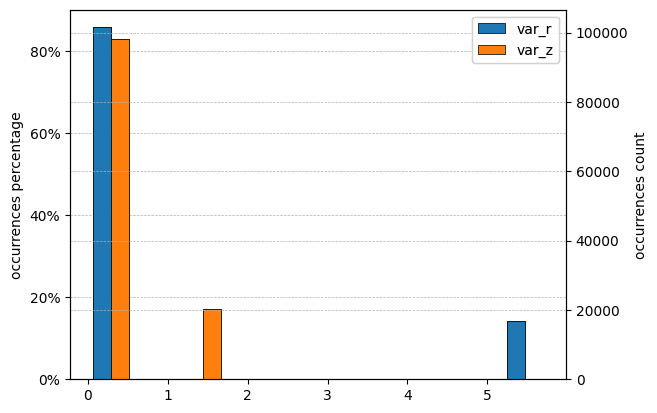

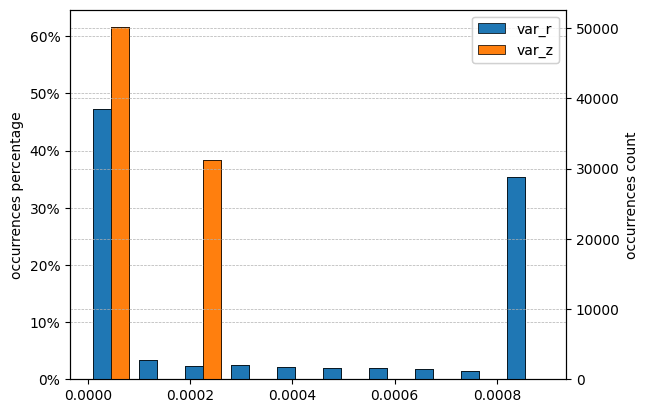

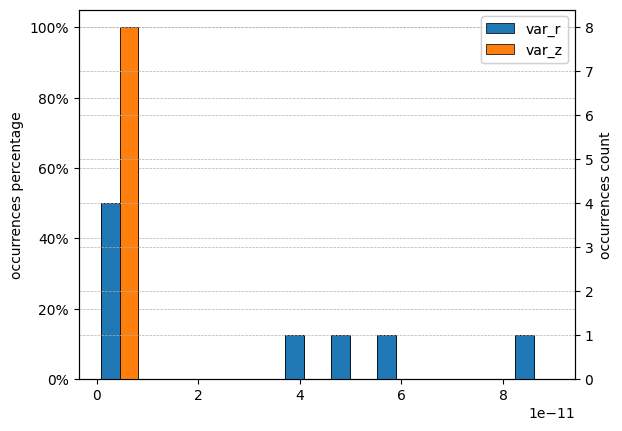

In [11]:
plot_multiple_histograms(spacepoints_df, ['var_r', 'var_z'])
filter = (spacepoints_df['var_r'] < 1) & (spacepoints_df['var_z'] < 1)
plot_multiple_histograms(spacepoints_df[filter], ['var_r', 'var_z'])
filter = (spacepoints_df['var_r'] < 1e-10) & (spacepoints_df['var_z'] < 1e-10)
plot_multiple_histograms(spacepoints_df[filter], ['var_r', 'var_z'])

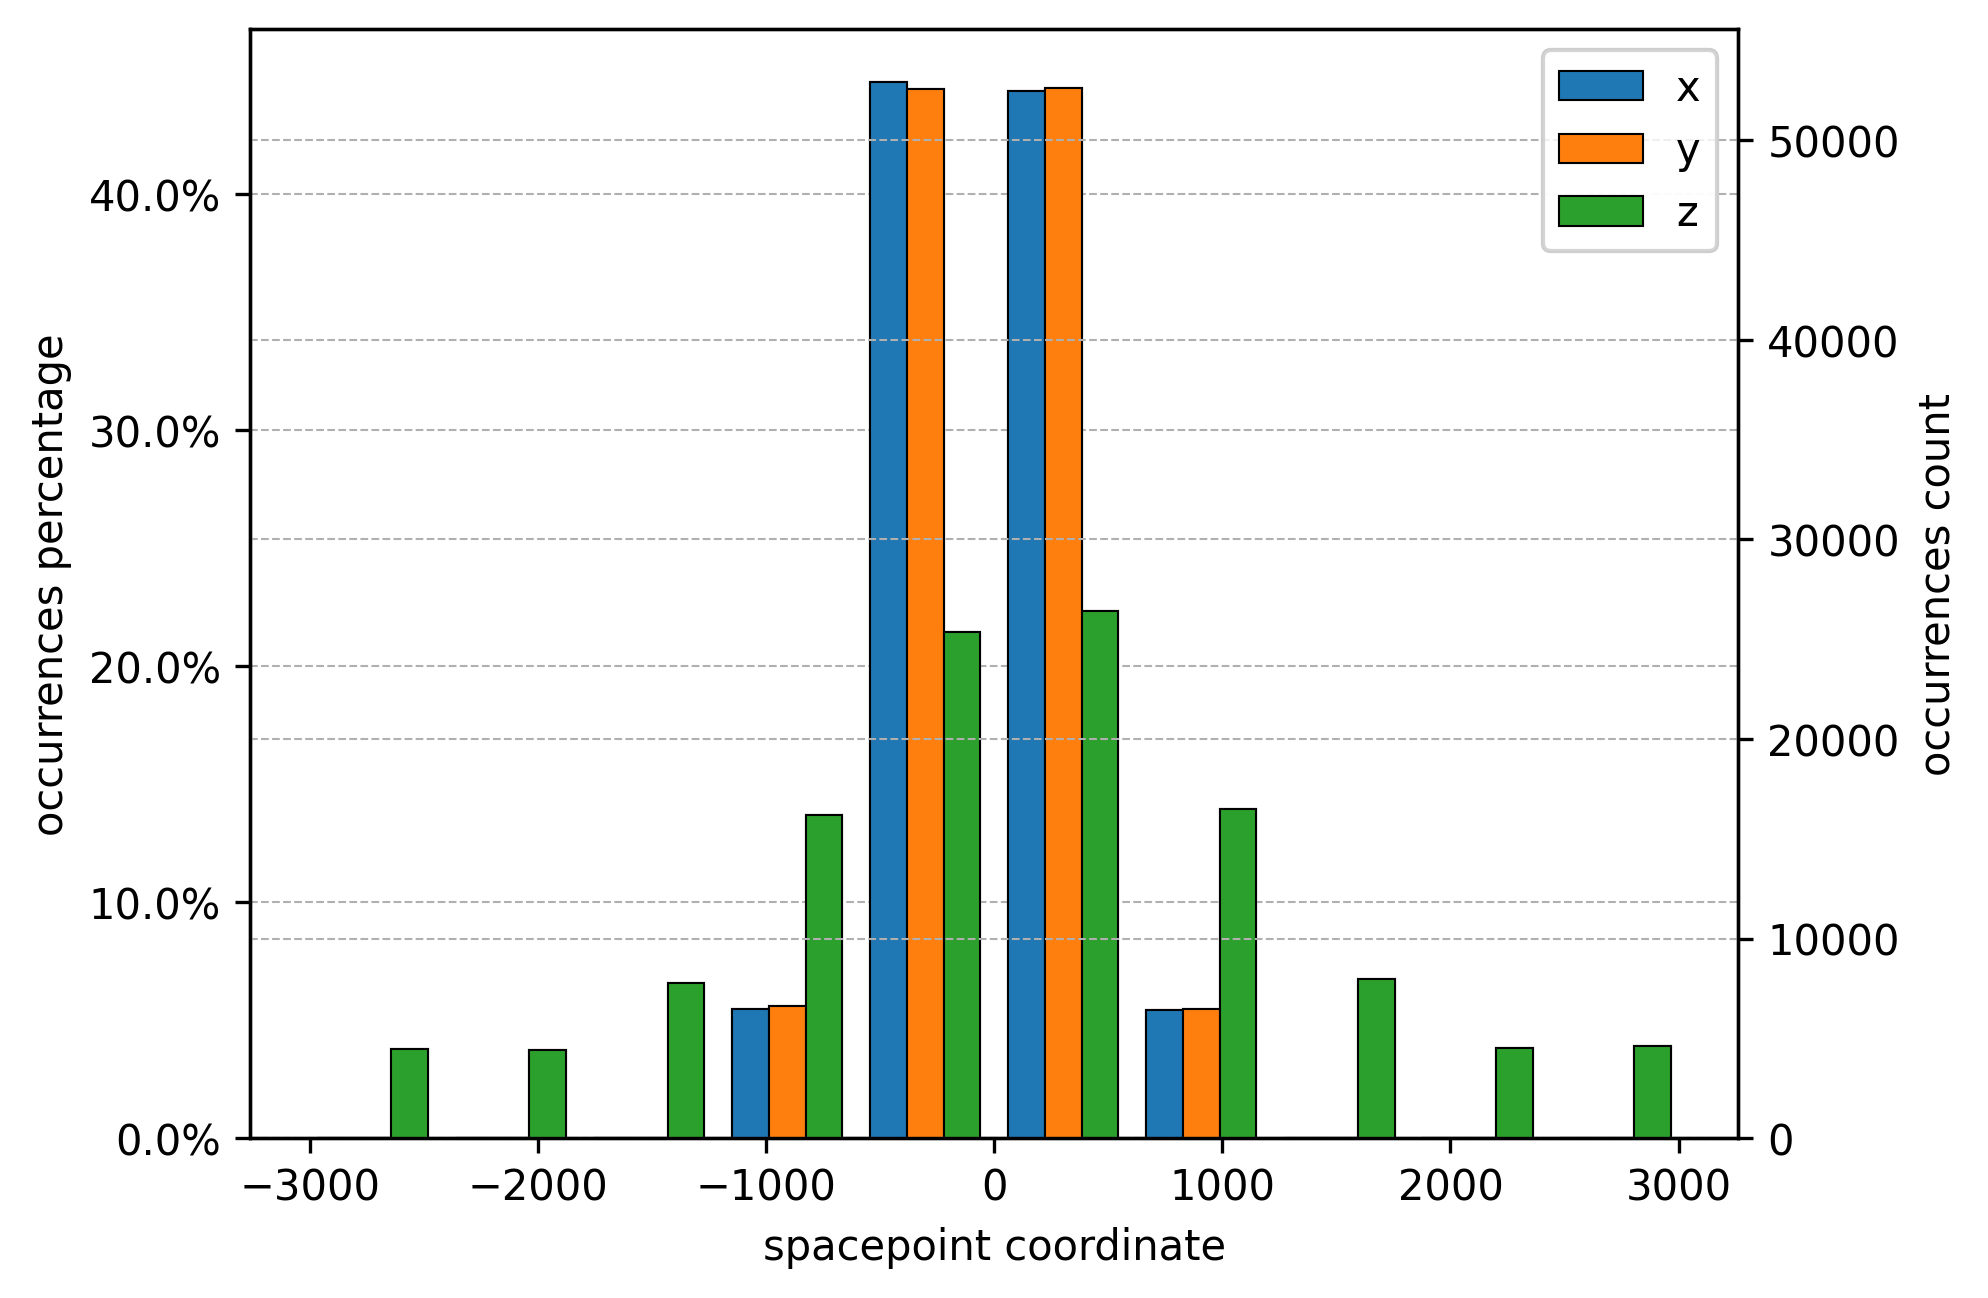

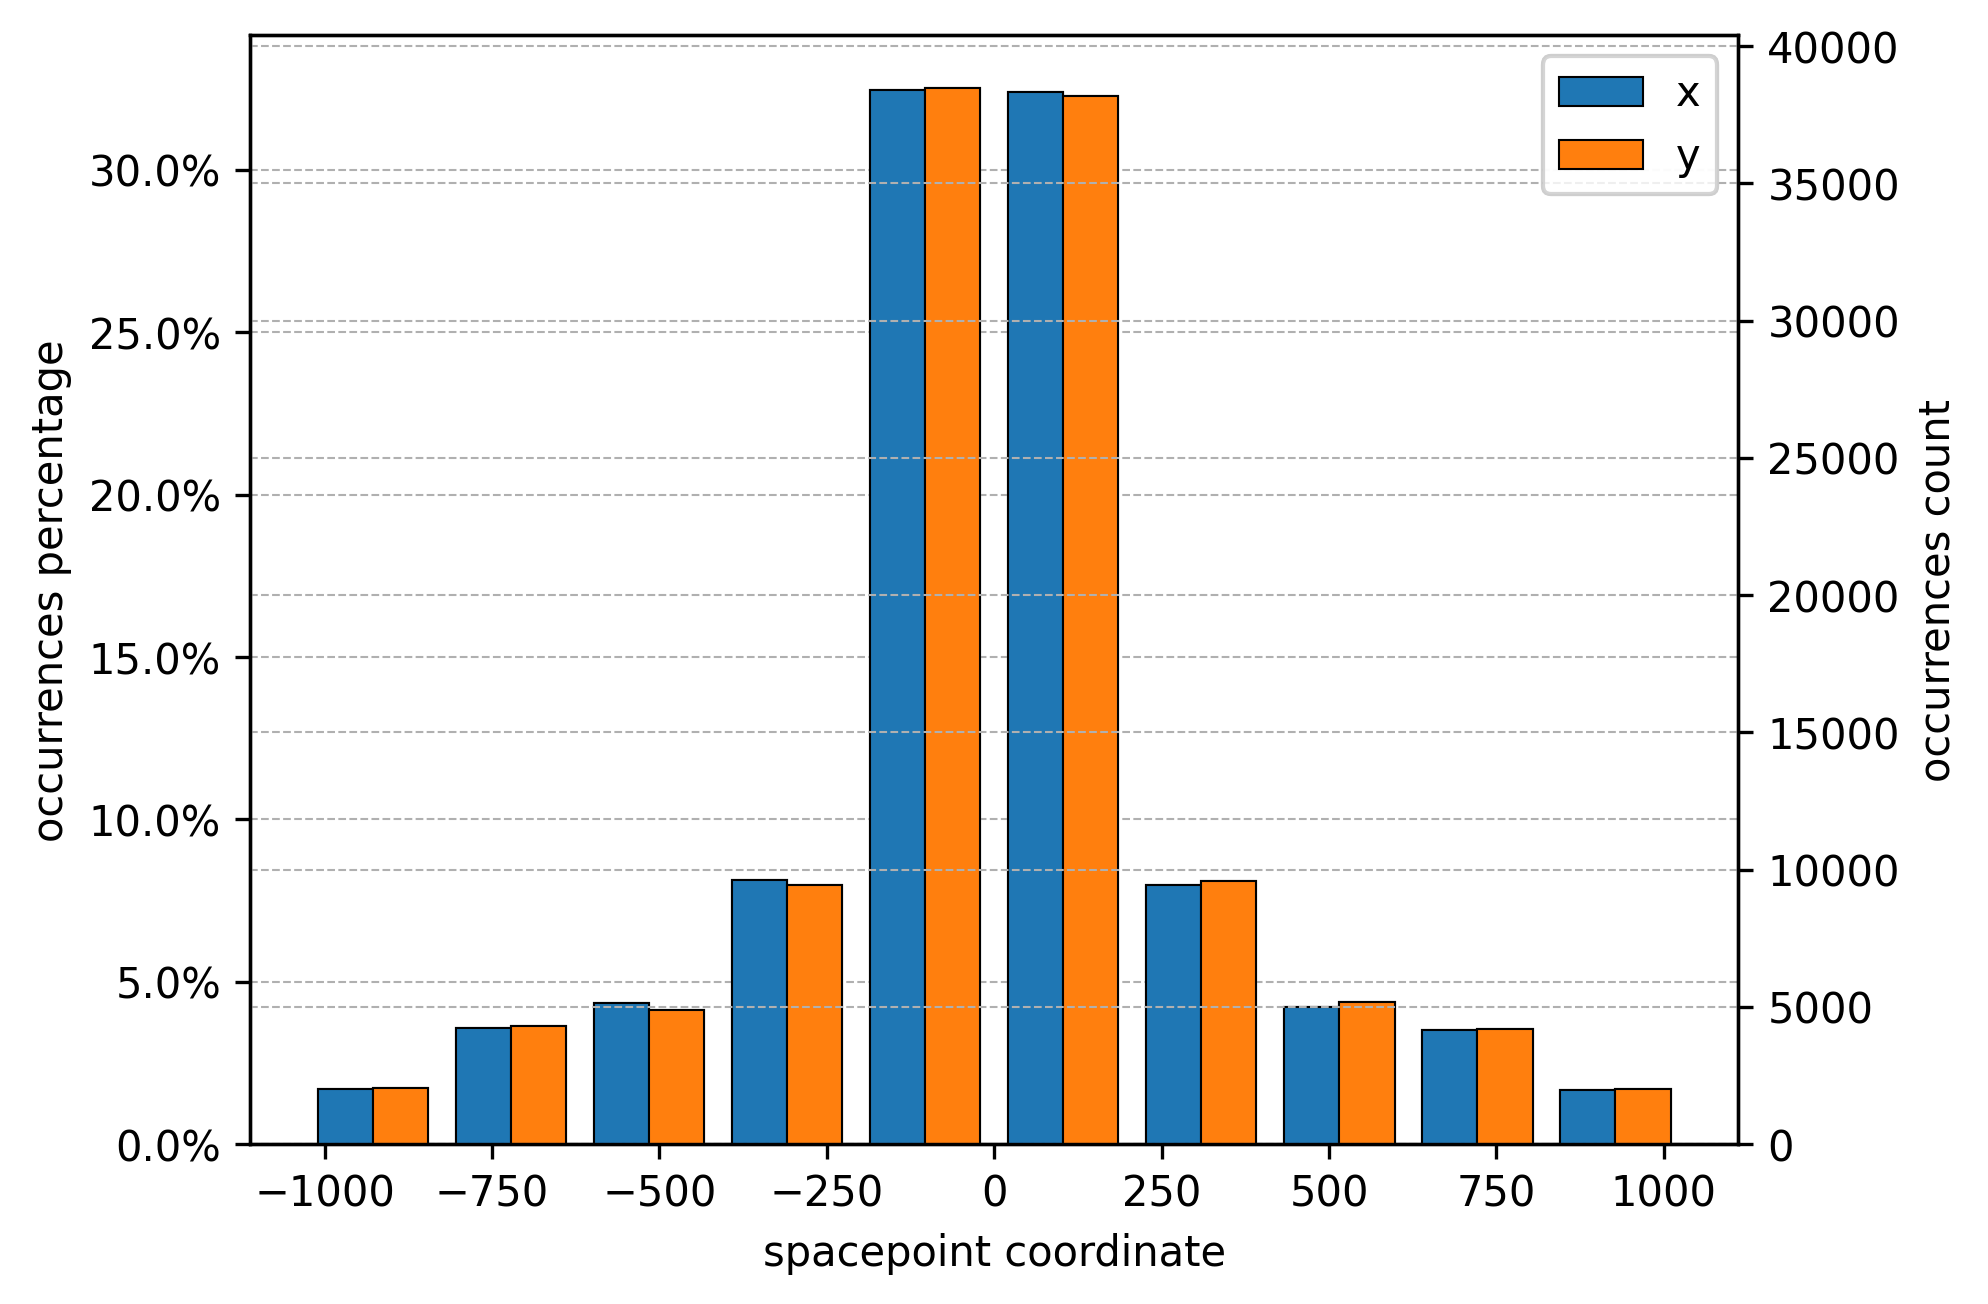

In [12]:
plot_multiple_histograms(spacepoints_df, ['x', 'y', 'z'], 'spacepoint coordinate', dpi=300)
plot_multiple_histograms(spacepoints_df, ['x', 'y'], 'spacepoint coordinate', dpi=300)
# plot_multiple_histograms(spacepoints_df, ['var_r', 'var_z'])

## particles_initial.csv

### stats

In [13]:
import numpy as np
import pandas as pd
particles_initial_df = pd.read_csv('./ODD_Single_muon_10k/particles_initial.csv')

In [14]:
particles_initial_df.filter(['phi', 'pt', 'q']).describe()

,phi,pt,q
count,10000.000000,10000.000000,10000.000000
mean,0.001389,5.477387,0.001400
std,1.815087,2.587265,1.000049
min,-3.140700,1.000834,-1.000000
25%,-1.567324,3.215759,-1.000000
50%,-0.002042,5.432233,1.000000
75%,1.580437,7.721736,1.000000
max,3.140698,9.997474,1.000000


### histograms

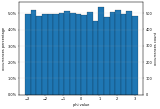

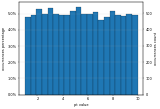

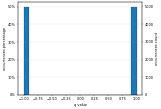

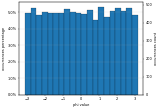

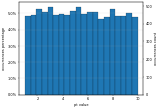

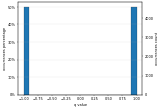

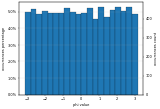

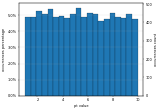

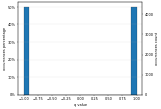

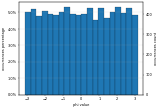

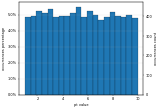

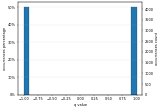

In [15]:
at_least_spacepoints = [3,6,8,10]
for i in at_least_spacepoints:
    dataframe = particles_initial_df[particles_initial_df['event_id'].isin(get_event_ids_with_spacepoints(i))]
    plot_histogram(dataframe, 'phi', dpi=25)
    plot_histogram(dataframe, 'pt', dpi=25)
    plot_histogram(dataframe, 'q', dpi=25)

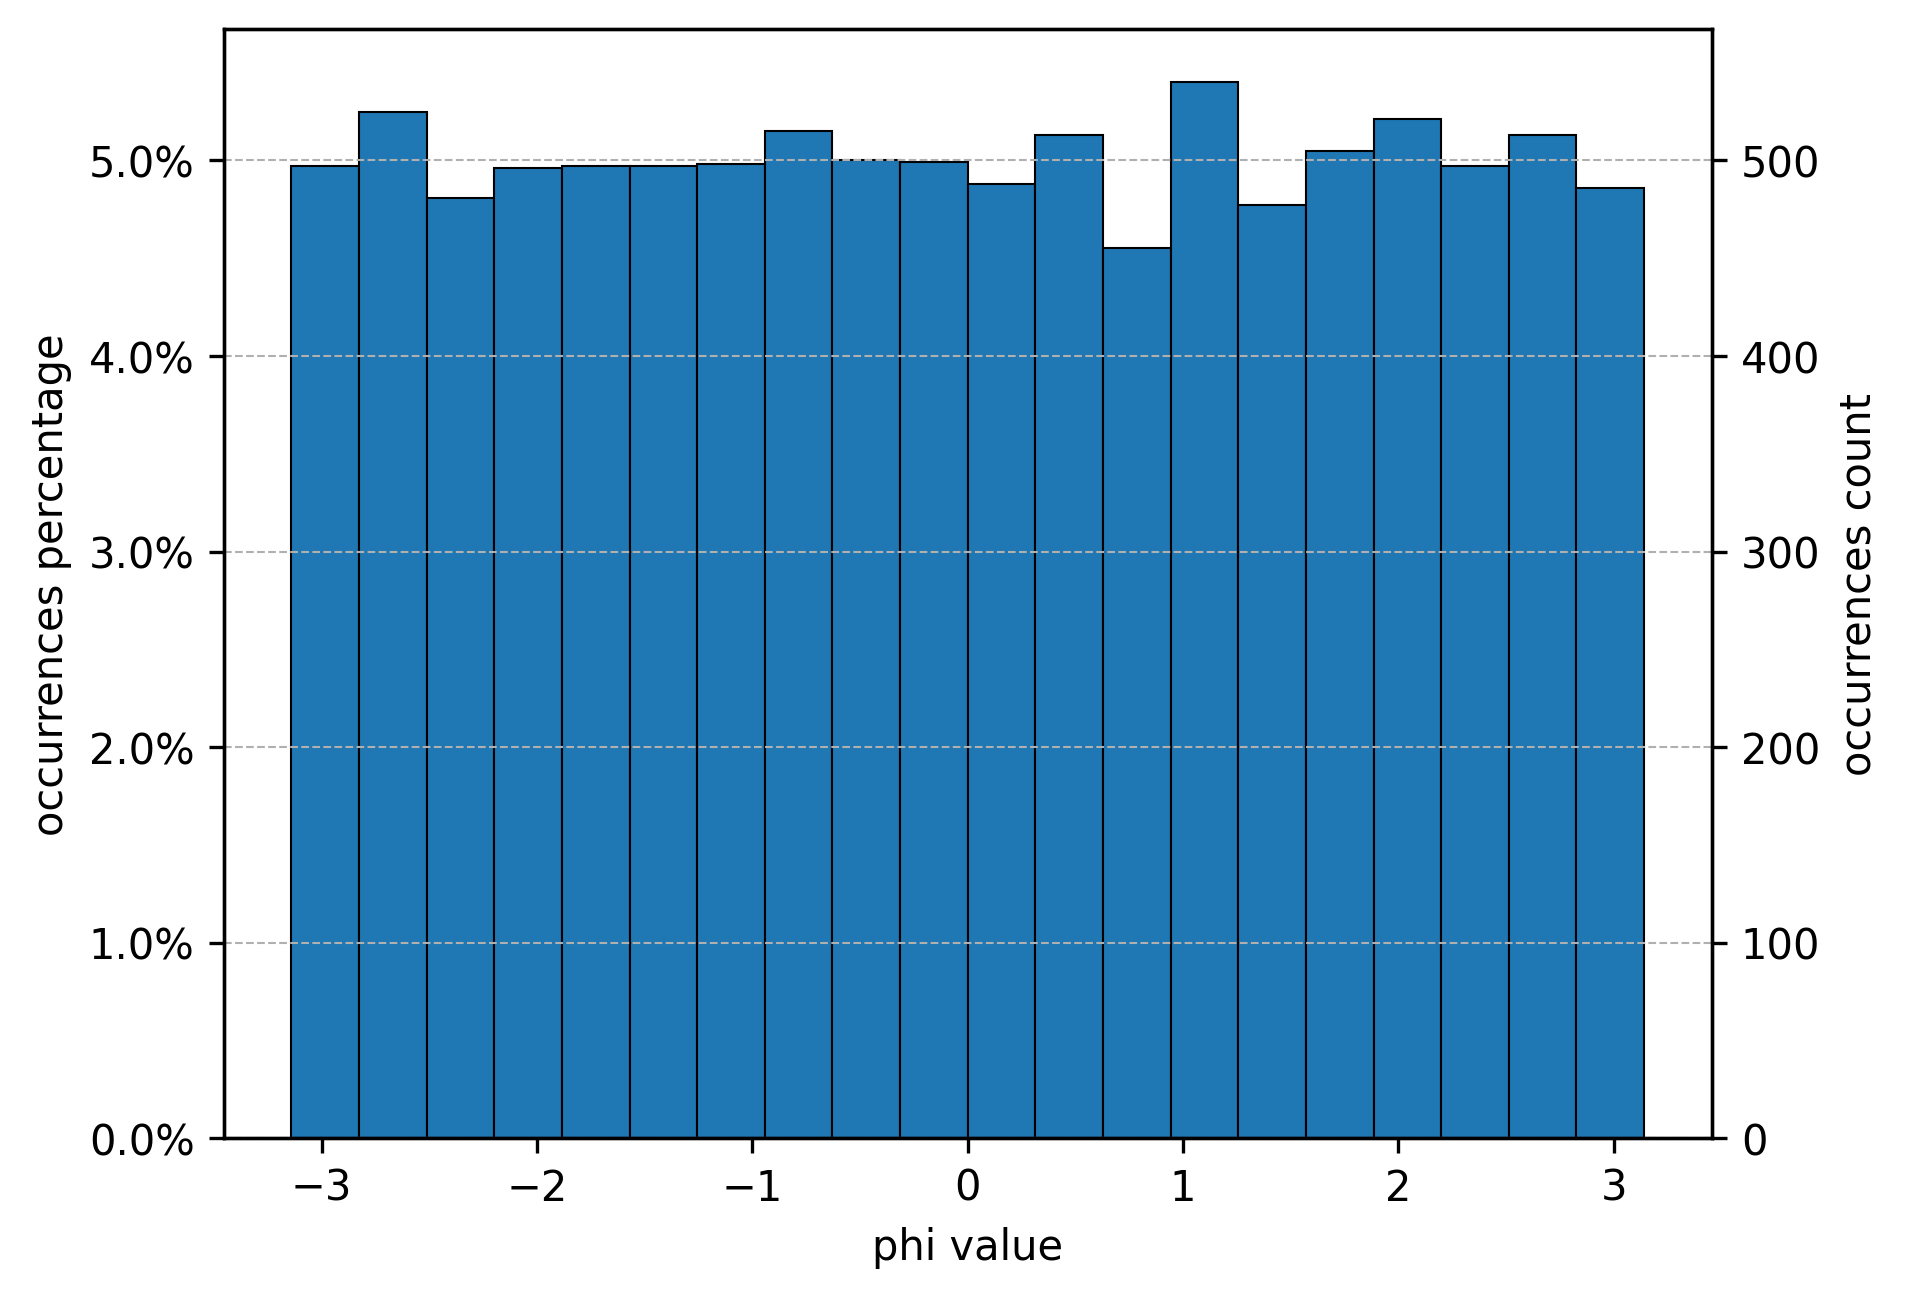

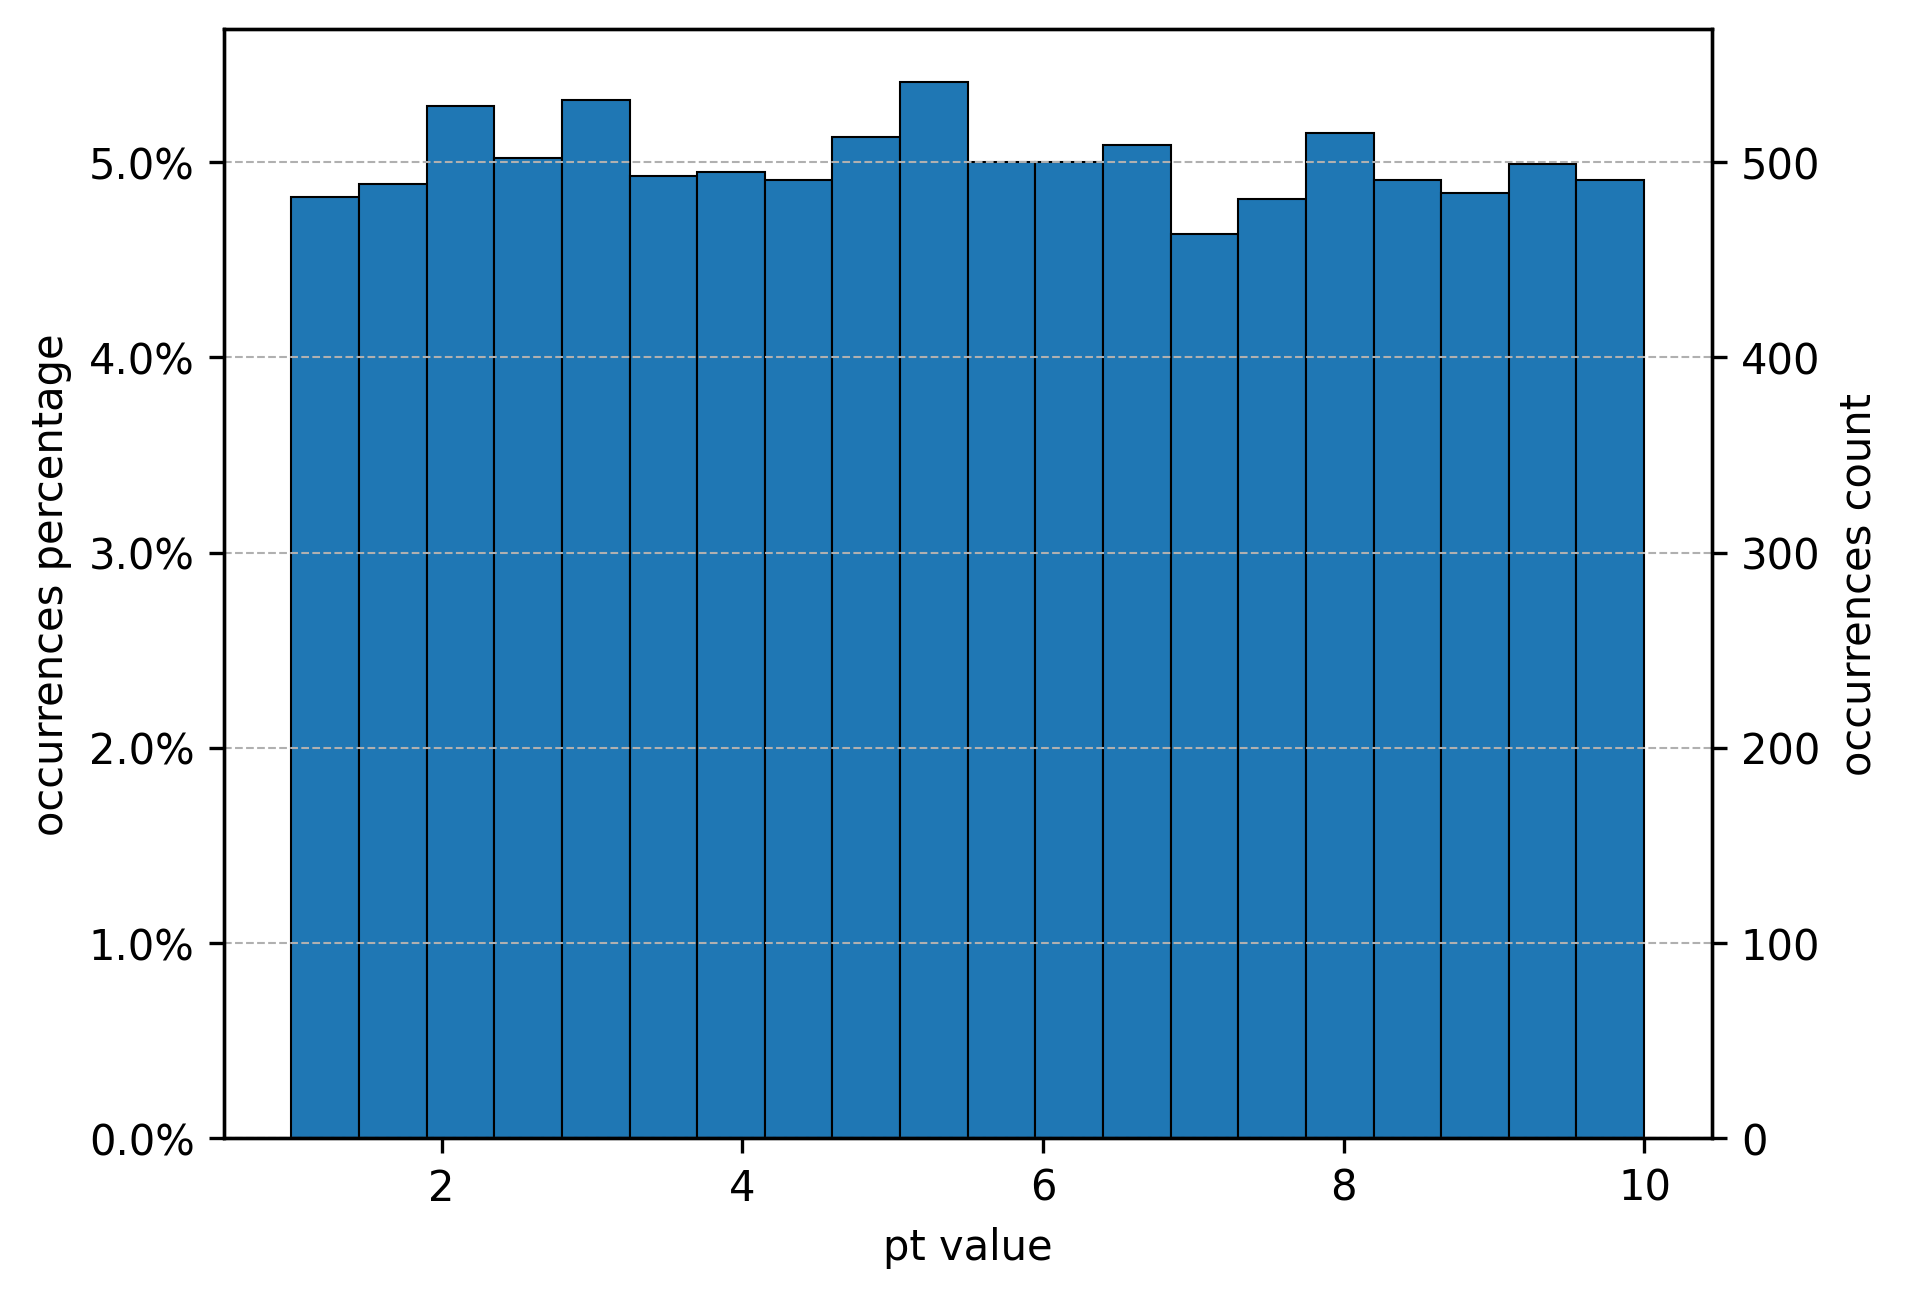

In [16]:
plot_histogram(particles_initial_df, 'phi', dpi=300)
plot_histogram(particles_initial_df, 'pt', dpi=300)

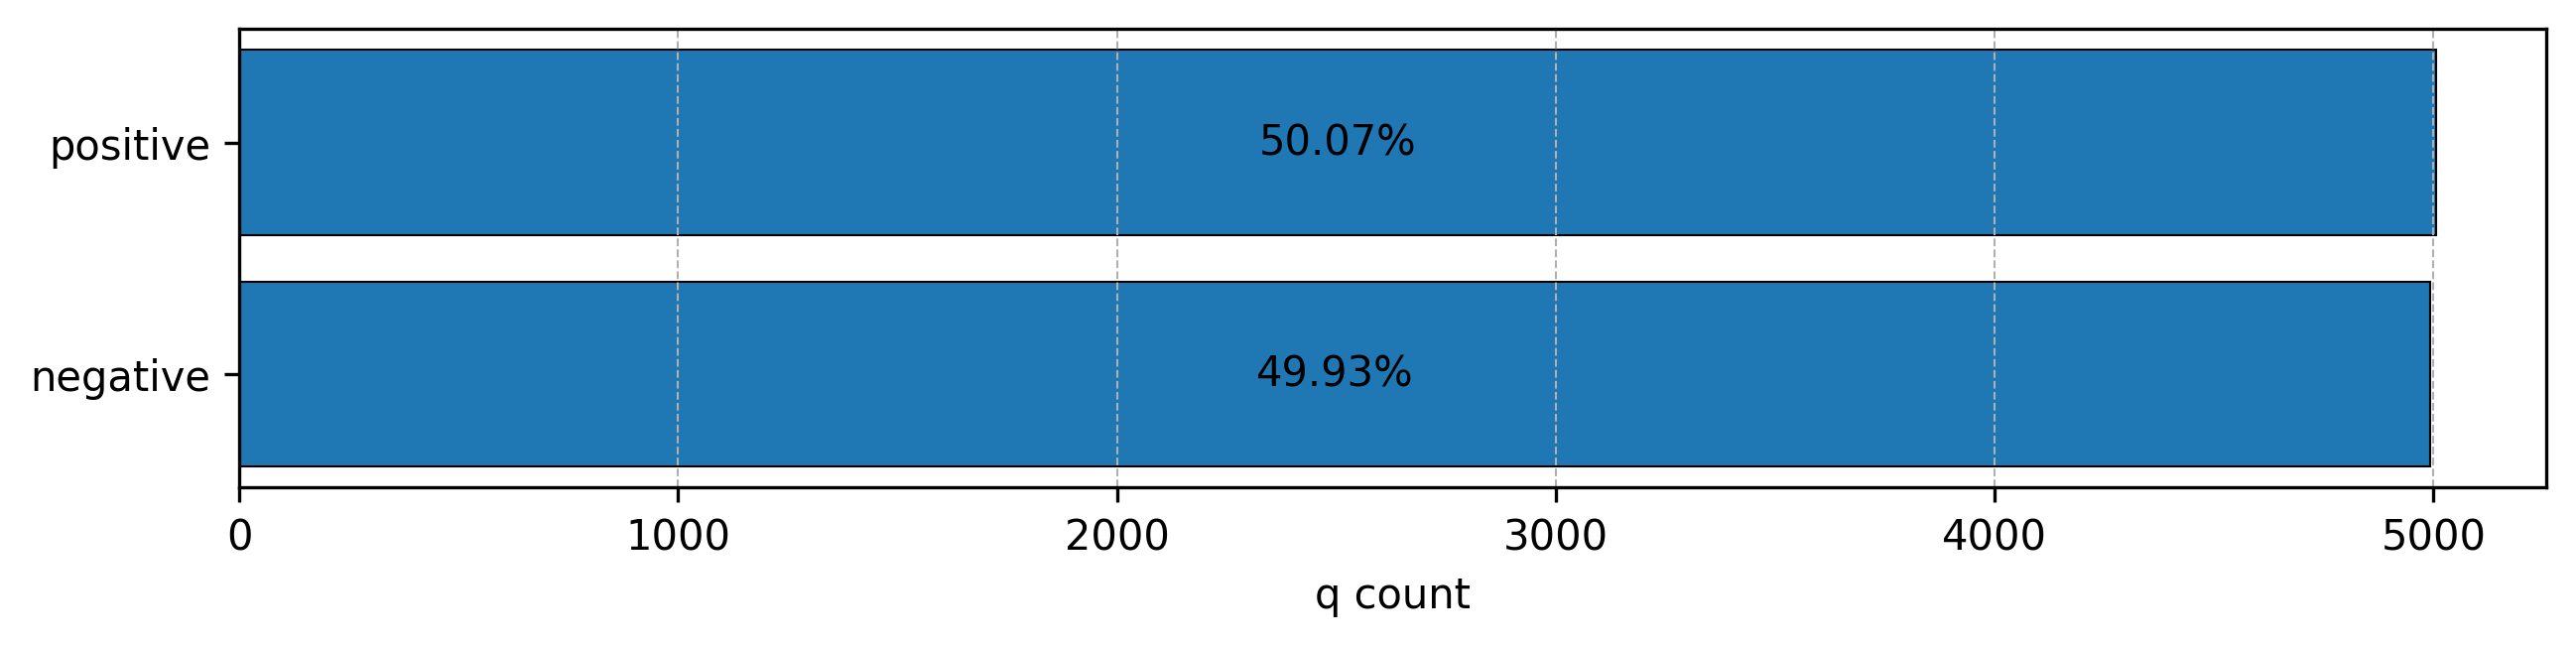

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 2))
fig.set_dpi(300)

labels = ('positive', 'negative')
q_data = (particles_initial_df['q'][particles_initial_df['q'] == 1].count(), 
          particles_initial_df['q'][particles_initial_df['q'] == -1].count())
y_pos = np.arange(len(labels))

bars = ax.barh(y_pos, q_data, align='center', edgecolor = 'black', lw=0.5)
ax.bar_label(bars, label_type='center', labels=[f'{100*x/particles_initial_df["q"].count():.2f}%' for x in bars.datavalues])

ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', linewidth=0.5)
ax.set_xlabel('q count')

plt.show()